<h2>Obesity or CVD risk (Classify/Regressor/Cluster)</h2>

<h4>Import necessary libraries</h4>

In [100]:
import pandas as pd
import numpy as np

import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


In [101]:
#df=pd.read_csv("ObesityDataSet.csv")
df=pd.read_csv("ObesityDataSet.csv")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [103]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [104]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<h4>Observe what unique values can categorical features take</h4>

In [105]:
obesity_cat=list(df['NObeyesdad'].unique())
num_models=len(obesity_cat)
cat_columns=['family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','Gender','CALC','MTRANS']
for col in cat_columns:
    print(f"{col} : {list(df[col].unique())}")


family_history_with_overweight : ['yes', 'no']
FAVC : ['no', 'yes']
CAEC : ['Sometimes', 'Frequently', 'Always', 'no']
SMOKE : ['no', 'yes']
SCC : ['no', 'yes']
Gender : ['Female', 'Male']
CALC : ['no', 'Sometimes', 'Frequently', 'Always']
MTRANS : ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']


<h2>Visualizing the data</h2>

<h4>Countplot for transportation used</h4>

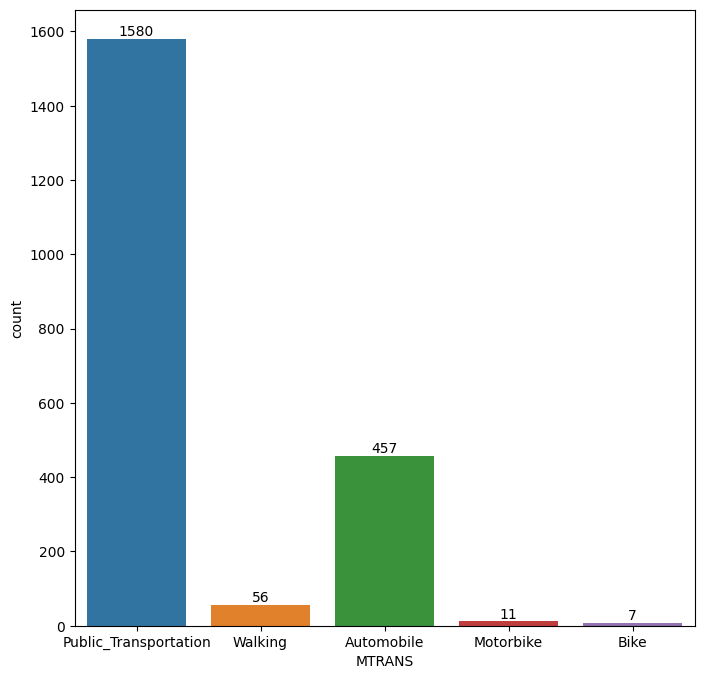

In [106]:
plt.figure(figsize=(8,8))
ax1=sns.countplot(x='MTRANS',data=df)

ax1.bar_label(ax1.containers[0])
plt.show()

<h4>Pie chart for each transportation, distributed by Gender</h4>

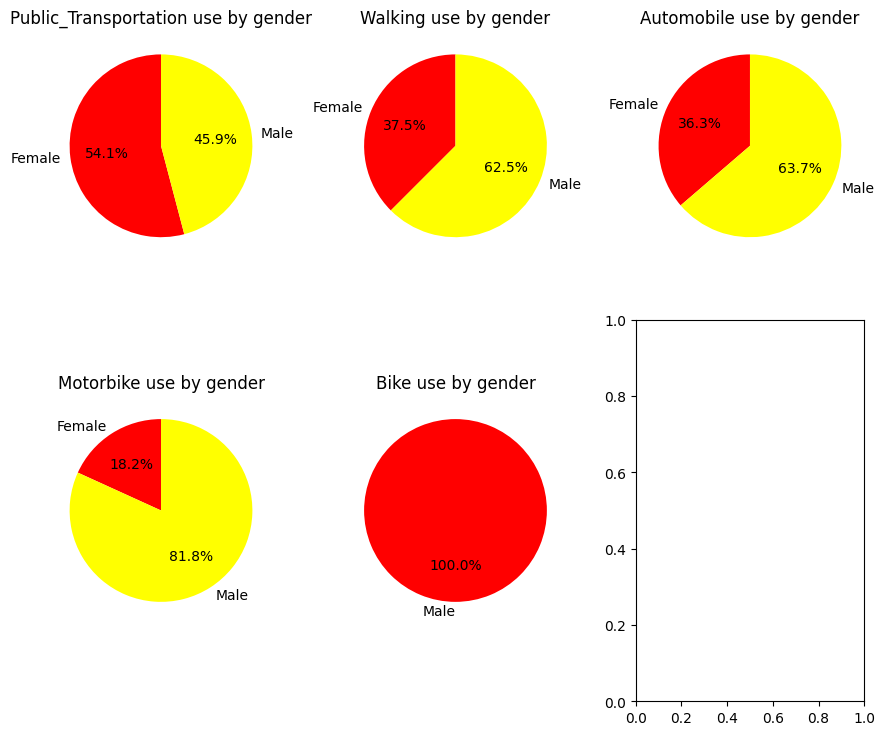

In [107]:
transport_list=list(df['MTRANS'].unique())

temp_df=df.groupby(by=['MTRANS','Gender']).agg({'Gender':'count'})
pct_df = temp_df.groupby(level=0,group_keys=False).apply(lambda x: round(100 * x / float(x.sum()),1))

fig2,ax2=plt.subplots(nrows=2,ncols=3,figsize=(9,8))
endrow=0

for i in range(len(transport_list)):
    pct_list=[]
    lbl_list=[]
    male_lbl=1
    female_lbl=1

    try:
        pct_list.append(pct_df.loc[transport_list[i]]['Gender']["Female"])
    except:
        female_lbl=0
    try:
        pct_list.append(pct_df.loc[transport_list[i]]['Gender']["Male"])
    except:
        male_lbl=0
    
    if male_lbl==0:
        lbl_list.append("Female")
    elif female_lbl==0:
        lbl_list.append("Male")
    else:
        lbl_list=['Female','Male']
    
    if i>2:
        ax2[1,i-3].pie(pct_list,labels=lbl_list,autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
        ax2[1,i-3].set_title(f"{transport_list[i]} use by gender")
    else:
        ax2[0,i].pie(pct_list,labels=lbl_list,autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
        ax2[0,i].set_title(f"{transport_list[i]} use by gender")

fig2.tight_layout()
    

<h4>Piechart of different obesity types by gender</h4>

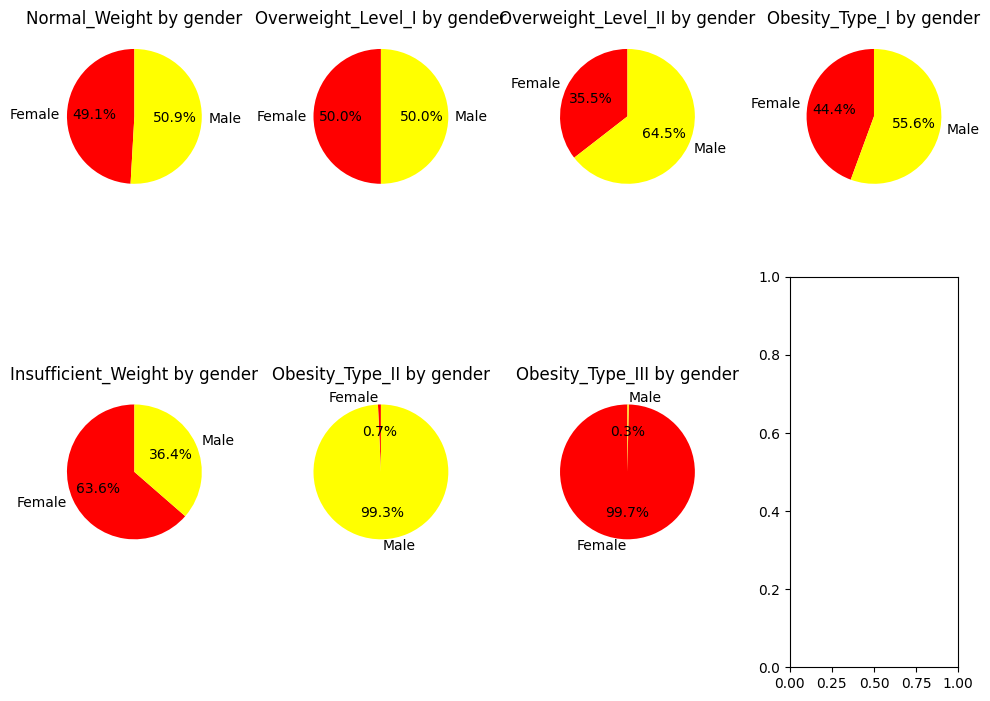

In [108]:
temp_df2=df.groupby(by=['NObeyesdad','Gender'],sort=True).agg({'Gender':'count'})

pct_df2 = temp_df2.groupby(level=0,group_keys=False).apply(lambda x: round(100 * x / float(x.sum()),1))

fig3,ax3=plt.subplots(nrows=2,ncols=4,figsize=(10,8))
endrow=0

for i in range(len(obesity_cat)):
    pct_list=[]
    pct_list.append(pct_df2.loc[obesity_cat[i]]['Gender'][0])
    pct_list.append(pct_df2.loc[obesity_cat[i]]['Gender'][1])
    
    if i>3:
        ax3[1,i-4].pie(pct_list,labels=['Female','Male'],autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
        ax3[1,i-4].set_title(f"{obesity_cat[i]} by gender")
    else:
        ax3[0,i].pie(pct_list,labels=['Female','Male'],autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
        ax3[0,i].set_title(f"{obesity_cat[i]} by gender")

fig3.tight_layout()

<h4>A complex scatter plot</h4>

In [109]:
temp_df3=df[['FCVC','CH2O','CAEC','SMOKE','NObeyesdad']].copy()

fig4=px.scatter(temp_df3,
                x="FCVC",y="CH2O",
                color="NObeyesdad",
                symbol="SMOKE",
                facet_col="CAEC",
                labels={"Nobeyesdad":"Obesity_Category","SMOKE":"Smoker"},

                #control the order in which legend is presented
                category_orders={"SMOKE": ["yes", "no"],
                                 "CAEC": ["no","Sometimes","Frequently","Always"],
                                 "NObeyesdad":["Insufficient_Weight","Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]
                                 }
                )
fig4.show()

"""
How to read this plot?

This plot represents 5 dimensions

One small plot represents the X-axis as Frequency of Consumption of Vegetables(FCVC) and Y-axis as Consumption of water daily(CH2O)
Each data point within a plot further represents two attibutes. The color signifies the Obesity category, and shape(marker) indicates whether the person is a smoker or not
There are 4 plots. Each plot represents the frequency of consumption of alcohol(CAEC).

"""


'\nHow to read this plot?\n\nThis plot represents 5 dimensions\n\nOne small plot represents the X-axis as Frequency of Consumption of Vegetables(FCVC) and Y-axis as Consumption of water daily(CH2O)\nEach data point within a plot further represents two attibutes. The color signifies the Obesity category, and shape(marker) indicates whether the person is a smoker or not\nThere are 4 plots. Each plot represents the frequency of consumption of alcohol(CAEC).\n\n'

<h4>Dataset transformations</h4>

In [110]:
#dataframe transformations
def model_ready(df):
    bin_cat_columns=['family_history_with_overweight','FAVC','SMOKE','SCC','Gender']
    multi_cat_columns=['CAEC','CALC','MTRANS']
    
    for col in bin_cat_columns:
        df[col]=df[col].apply(lambda x: 1 if x=='yes' or 'Male' else 0)
    
    #Perform One hot encoding for mulii categorical columns
    encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
    for col in multi_cat_columns:
        encoded_data = encoder.fit_transform(df[[col]])
        df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
        df.drop([col],axis=1,inplace=True)
        df=pd.concat([df,df_encoded],axis=1)
    
    #Create BMI column
    df['BMI']=round(df['Weight']/(df['Height'])**2,2)
    df.drop(columns=['Weight','Height'],inplace=True)
        
    return df

In [111]:
def map_Y(df):
    class_dict={}
    output_cat=list(df['NObeyesdad'].unique())

    for i in range(len(output_cat)):
        class_dict.update({output_cat[i]:i})
    
    df['NObeyesdad']=df['NObeyesdad'].apply(lambda x: class_dict[x])
    
    return df['NObeyesdad']
    

In [112]:
final_df=model_ready(df)

Y=map_Y(final_df[['NObeyesdad']].copy())

X=final_df.drop(columns=['NObeyesdad'],inplace=False)

<h4>Selection of best model</h4>

<h4>There are five models which will be tried here for multiclass classification:</h4>
<ol>
<li>SVM with linear kernel</li><br>
<li>SVM with polynomial kernel</li><br>
<li>SVM with rbf kernel</li><br>
<li>Gaussian Naive Bayes</li><br>
<li>Decision Tree (Light GBM)</li><br>
</ol>

In [113]:
def check_models(X,Y):
    X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=0)

    model_list=['SVC_linear','SVC_poly','SVC_rbf','Naive_Bayes',"Decision Tree (Light GBM)"]
    model_scores={}
    kernel_list=['linear','poly','rbf']

    for i in range(len(model_list)):
        
        start = time.time()

        if i<3:
            SVM_model=SVC(kernel=kernel_list[i])
            SVM_model.fit(X=X_train,y=Y_train)

            preds=SVM_model.predict(X_val)

        elif i==3:
            gnb = GaussianNB()
            gnb.fit(X_train, Y_train) 

            preds=gnb.predict(X_val)
        else:
            
            params = {
                'objective': 'multiclass',
                'num_class': len(obesity_cat),
                'metric': 'multi_logloss',
                'verbose': 0
            }

            train_data = lgb.Dataset(X_train, label=Y_train)
            valid_data = lgb.Dataset(X_val, label=Y_val, reference=train_data)
           
            num_round = 100 
            lgb_model = lgb.train(params,
                            train_data,
                            num_round,
                            callbacks=[
                                lgb.early_stopping(stopping_rounds=3),
                            ],
                            valid_sets=[valid_data])
            
            preds=lgb_model.predict(X_val,num_iterations=lgb_model.best_iteration)
            preds = np.argmax(preds, axis=1)

    
        accuracy=accuracy_score(Y_val,preds)
        model_scores.update({model_list[i]:accuracy})

        print(f"Classification report for {model_list[i]} model is below:")
        print(classification_report(Y_val,preds))

        end = time.time()
        execution_time = end - start
        print(f"Execution time for {model_list[i]}: {execution_time:.2f} seconds")
        print("\n")

    print(model_scores)
    print("\n")
    return model_scores

In [114]:
model_scores=check_models(X,Y)

Classification report for SVC_linear model is below:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.93      0.95      0.94        57
           2       0.98      0.95      0.96        55
           3       0.98      0.97      0.98        67
           4       0.97      1.00      0.98        65
           5       0.96      1.00      0.98        53
           6       1.00      1.00      1.00        69

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423

Execution time for SVC_linear: 0.03 seconds


Classification report for SVC_poly model is below:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        57
           1       0.78      0.88      0.83        57
           2       0.87      0.87      0.87        55
           3       1.00      0.93   

In [115]:
max_score=0
max_key=""
for key in model_scores:
    if model_scores[key]>=max_score:
        max_score=model_scores[key]
        max_key=key

print(f"The best model is {max_key} with accuracy score {max_score}")


The best model is Tree with accuracy score 0.9810874704491725
